# Final Exam Project
## for the class on Collecting and Analyzing Big Data
---
Daria Dementeva - r0771521


Nina Morgenstern - r0772330

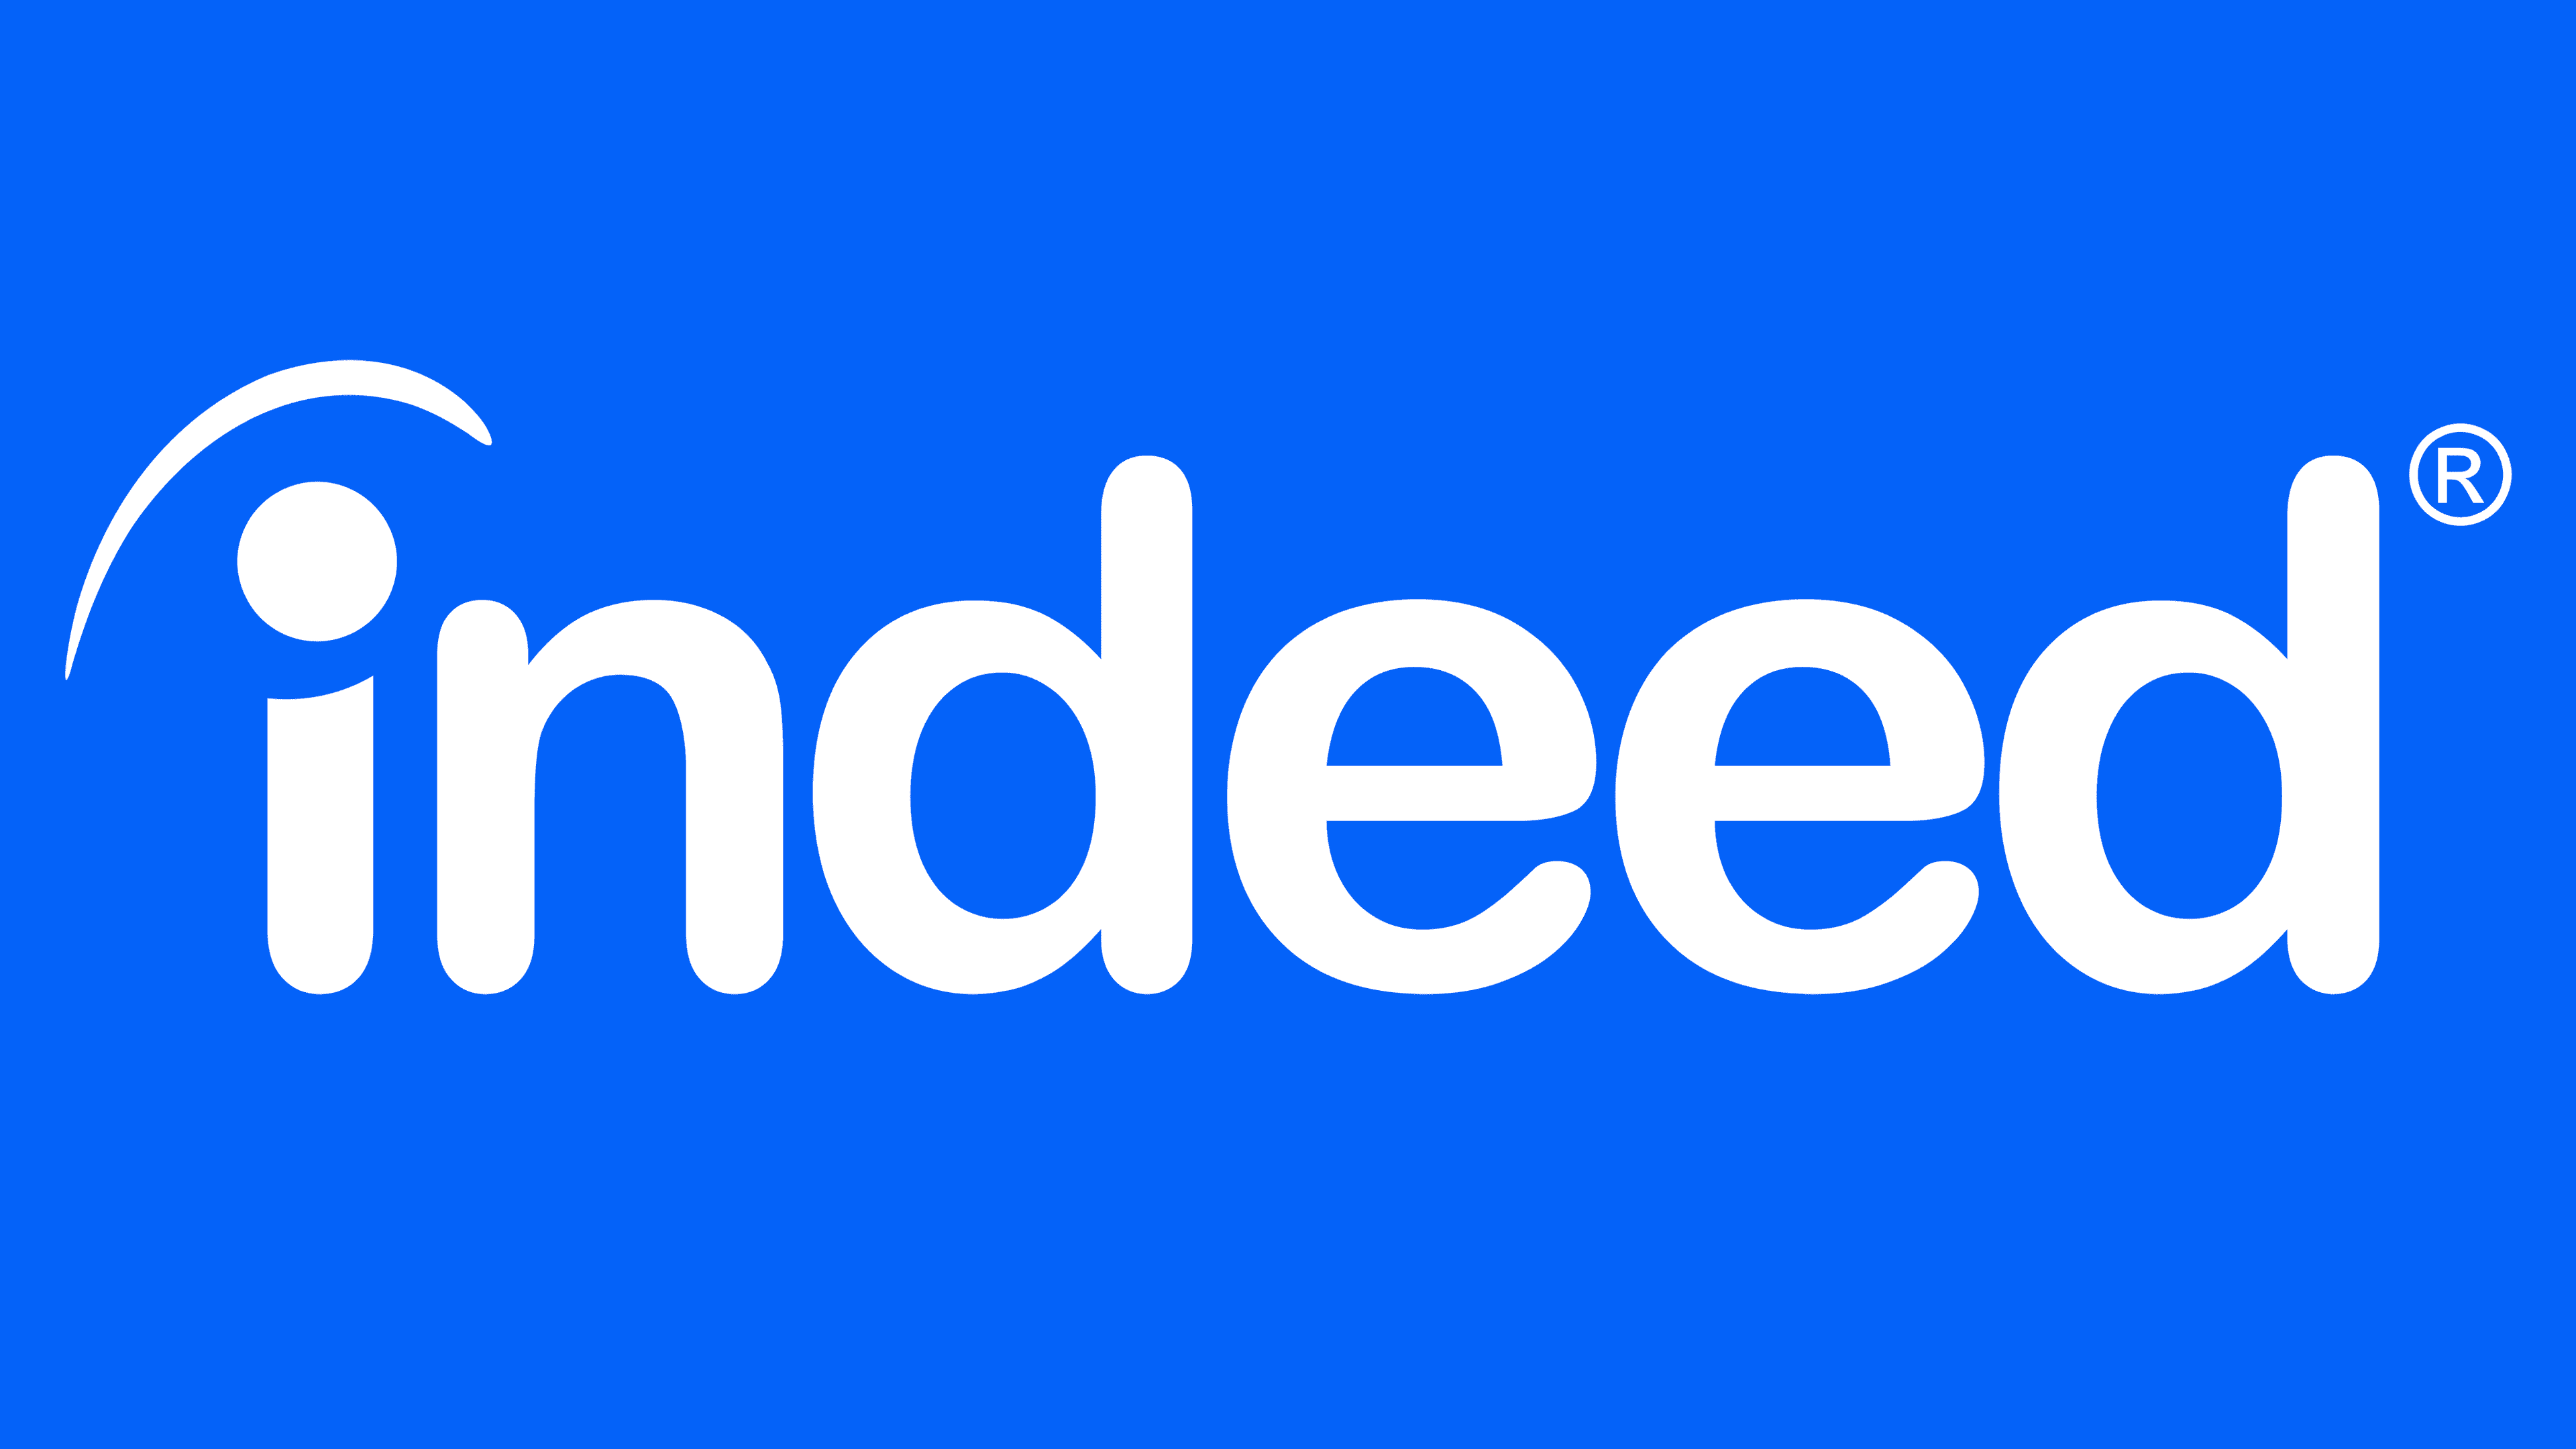

# Imports

In the first step, we import the necessary packages for our anaylsis.

In [ ]:
#Installations
!pip install langdetect
!pip install fake-useragent
!pip install top2vec

#Basic packages
import pandas as pd
import re
import math
import time
import numpy as np
import top2vec

#Web scraping packages
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from langdetect import detect

#NLP packages
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.collocations import *
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from top2vec import Top2Vec


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Descriptive Analysis
We conduct preliminary descriptive analysis to explore our textual data and get an idea of what words and word collocations are the most frequent. To do so, we demonstrate a word frequency distribution. In addition to individual words that appeared in the word frequency distribution, we show n-grams (the sequences of tokens) of lengths 2 and 3 (referred to as bigrams and trigrams) to identify the most important word collocations used for data-related job postings (Novy, 2020). 



## Word Frequency Distribution

To visualize our word frequency distribution, we first tokenize the descriptions. To obtain the word frequency distribution, we use the function "FreqDist" from the NLTK package. Then we print 30 most frequent words.

In [ ]:
tokenized_word=word_tokenize(str(df_english["Cleaned_Text"]))

In [ ]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 1042 samples and 2467 outcomes>


In [ ]:
fdist.most_common(30)

[('data', 134),
 ('team', 30),
 ('experience', 27),
 ('engineer', 26),
 ('business', 24),
 ('platform', 21),
 ('solution', 21),
 ('customer', 19),
 ('work', 18),
 ('science', 16),
 ('technology', 16),
 ('knowledge', 15),
 ('working', 15),
 ('service', 15),
 ('project', 14),
 ('support', 14),
 ('engineering', 14),
 ('research', 13),
 ('product', 13),
 ('new', 13),
 ('cloud', 13),
 ('big', 13),
 ('environment', 12),
 ('requirement', 12),
 ('aws', 12),
 ('iot', 12),
 ('implement', 11),
 ('use', 11),
 ('company', 10),
 ('skill', 10)]

Our implications are as follows. The most frequent word is "data". This is obvious as the job description are data-related. The following frequent word is "team". It is, in general, in line with the requirements for data scientists, data analysts, data engineers etc. Typically, data-related tasks and projects are processed in teams. We may imply that data-related jobs are connected with extensive teamwork. Another plausible interpretation is that working requires being involved in a team of colleagues and partners, in general.  The next popular word is experience.  As data-related tasks and projects require a great deal of problem-solving skills, it means that an application should have some prior experience in manipulating problem-specific datasets and building statistical models. However, this might be sketchy evidence in favour of so-called the "Permission Paradox".  The "Permission Paradox" refers to the situation when someone cannot get a proper job without experience, but someone cannot get experience without a job (No Work Experience? Here's How To Overcome The Permission Paradox And Get Hired, 2019). The "Permission Paradox" might also be related to the general graduate unemployment in the situation of qualified labour force shortage. Highly educated graduates in data science, statistics, data engineering and business analytics, are expected to find a job without any obstacle. However, otherwise frequently happen.
Other frequent words are "solution', "science",  "technology",  "knowledge", "research". It can serve as evidence that data-related jobs are still embedded into research-related and science-oriented context. 
The figure below shows the word frequency distribution.

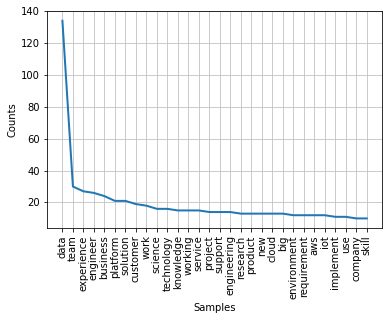

In [ ]:
fdist.plot(30,cumulative=False)
plt.show()

##n-grams: Collocations

Next, we find bigram word collocations using the function "BigramCollocationFinder" from the NLTK package. We show the 30 most frequent bigrams below. Implicitly, we notice various bigrams categories. For example, bigrams such as ('communication', 'skill'), ('close', 'collaboration'), ('team, player'), ('customer', 'service') may refer to a general set of soft skills data-related jobs require for internal and external communication. Next, bigrams such as ('ai', 'engineer'), ('big', 'data'), ('computer', 'science'),('data', 'integration'), ('data', 'pipeline'), ('machine', 'learning') may refer to a general set of hard skills data-related jobs require. Likewise, we notice another interesting bigram, ('bruxelles', 'evere'). This may point to the location dependency of data-related employment in Belgium. Data-related jobs are concentrated in the capital city of Belgium and, in particular, in the municipality of Evere.

In [ ]:
finder = BigramCollocationFinder.from_words(tokenized_word)
bigram_measures = nltk.collocations.BigramAssocMeasures()
sorted(finder.nbest(bigram_measures.raw_freq, 30))

[('ai', 'engineer'),
 ('big', 'data'),
 ('bruxelles', 'evere'),
 ('close', 'collaboration'),
 ('cloud', 'architect'),
 ('communication', 'skill'),
 ('computer', 'science'),
 ('customer', 'service'),
 ('data', 'analytics'),
 ('data', 'cloud'),
 ('data', 'engineer'),
 ('data', 'engineering'),
 ('data', 'integration'),
 ('data', 'pipeline'),
 ('data', 'platform'),
 ('data', 'science'),
 ('data', 'scientist'),
 ('data', 'solution'),
 ('data', 'source'),
 ('de', 'werkgever'),
 ('decathlon', 'belgium'),
 ('degree', 'computer'),
 ('direct', 'de'),
 ('disqover', 'platform'),
 ('junior', 'data'),
 ('machine', 'learning'),
 ('team', 'player'),
 ('use', 'case'),
 ('vacature', 'vacature'),
 ('vito', 'data')]

In [ ]:
finder = TrigramCollocationFinder.from_words(tokenized_word)
trigram_measures = nltk.collocations.TrigramAssocMeasures()
sorted(finder.nbest(trigram_measures.raw_freq, 30))

[('big', 'data', 'cloud'),
 ('close', 'collaboration', 'data'),
 ('collaboration', 'data', 'scientist'),
 ('communication', 'skill', 'english'),
 ('computer', 'science', 'related'),
 ('data', 'analysis', 'data'),
 ('data', 'analytics', 'consultant'),
 ('data', 'cloud', 'architect'),
 ('data', 'science', 'activity'),
 ('data', 'science', 'hub'),
 ('data', 'source', 'develop'),
 ('de', 'werkgever', 'direct'),
 ('de', 'werkgever', 'vacature'),
 ('degree', 'computer', 'science'),
 ('department', 'customer', 'service'),
 ('direct', 'de', 'werkgever'),
 ('diverse', 'data', 'source'),
 ('engineer', 'data', 'science'),
 ('english', 'dutch', 'french'),
 ('experience', 'big', 'data'),
 ('iot', 'sr', 'manager'),
 ('junior', 'data', 'engineer'),
 ('language', 'python', 'r'),
 ('life', 'science', 'healthcare'),
 ('like', 'raw', 'oil'),
 ('master', 'degree', 'computer'),
 ('oorspronkelijke', 'vacature', 'vacature'),
 ('professional', 'service', 'provider'),
 ('rapporteren', 'direct', 'de'),
 ('vacat

Trigrams provide a deeper insight into what skills might be relevant for a data-related job. For instance, we notice the trigrams like  ('english', 'dutch', 'french'), ('communication', 'skill', 'english'), which might refer to language skills an applicant should possess. As we argued above, it might be the case that even though the job description is in English, an application still should speak either French or Dutch or both. Other noticeable trigrams are ('experience', 'big', 'data'), ('language', 'python', 'r'), ('big', 'data', 'cloud'), which might refer to hard skills in big data analytics and cloud services, programming experience in R or Python. Likewise, these trigrams ('master', 'degree', 'computer'), ('computer', 'science', 'related'), ('degree', 'computer', 'science') might point out that an applicant should have a degree in a computer science.

##Identify relevant skills
Here we define a function to check which skill set is relevant for the job search. The function one-hot encodes the skills and adds a 1 for every document they are present in. This way we can get an overview of the popularity of certain skills.


In [ ]:
# function to count how many documents mention a keyword/skill
skill_set = ["sql", "matlab", "python"]


def search_skill(document, skill):
  skill_present = 0
  for word in document.split(" "):
    if (word.lower() == skill):
      skill_present = 1
  return skill_present

# apply it to our data
for skill in skill_set:
  df_english[skill] = df_english.apply(lambda x: search_skill(x.Cleaned_Text, skill), axis = 1)

We can see that SQL is a relevant skill for all job searches, but less for the machine learning engineer. Matlab is more relevant for the data engineer search. Python is mentioned often for all jobs, especially for the data engineer. The data analyst related job descriptions seem to bring up Python skills less often.

In [ ]:
# display pivot table
pd.pivot_table(df_english, index="Job_Category", aggfunc="sum", values=skill_set, margins=True, margins_name='Total') # feature with job descritpion

,matlab,python,sql
Job_Category,,,
business intelligence,9,121,108
data analyst,4,56,114
data engineer,27,250,151
data scientist,12,145,113
machine learning engineer,11,142,44
Total,63,714,530
